In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('weight-height.xls')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
df.shape

(10000, 3)

In [ ]:
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [ ]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [ ]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [ ]:
df.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [ ]:
for i in df:
  print("COlumn "+i,(df[i]==0).sum())

COlumn Gender 0
COlumn Height 0
COlumn Weight 0


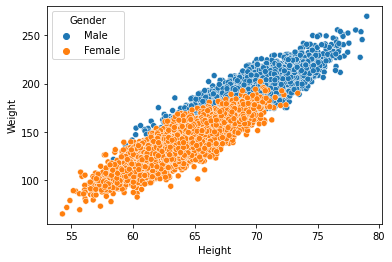

In [ ]:
sns.scatterplot(data=df,x='Height',y='Weight',hue='Gender')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


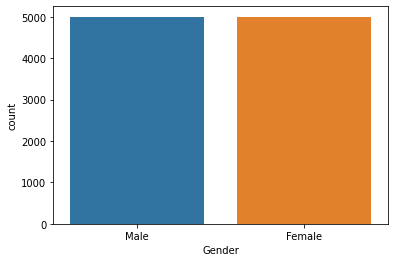

In [ ]:
sns.countplot(df['Gender'])
plt.show()

In [ ]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [ ]:
df.tail()

,Gender,Height,Weight
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461
9999,0,61.944246,113.649103


In [ ]:
x1=df[['Height']]
y1=df[['Weight']]
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 1)
(2500, 1)
(7500, 1)
(2500, 1)


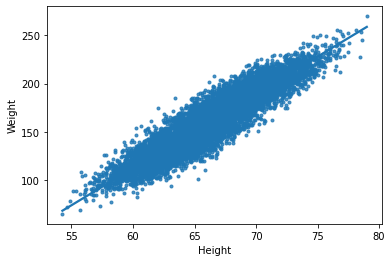

In [ ]:
sns.regplot(data=df,x=x1,y=y1,marker='.')

In [ ]:
from sklearn.linear_model import LinearRegression
reg1=LinearRegression()

In [ ]:
reg1.fit(x_train ,y_train)
y_pred_train=reg1.predict(x_train)
y_pred_test=reg1.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("For Training Data:")
print("MSE=",mean_squared_error(y_train,y_pred_train))
print("MAE=",mean_absolute_error(y_train,y_pred_train))
print("R2 score=",r2_score(y_train,y_pred_train))
print("\nFor Test Data:")
print("MSE=",mean_squared_error(y_test,y_pred_test))
print("MAE=",mean_absolute_error(y_test,y_pred_test))
print("R2 score=",r2_score(y_test,y_pred_test))

For Training Data:
MSE= 148.56961661347896
MAE= 9.72362903643429
R2 score= 0.8553432025527216

For Test Data:
MSE= 151.46996027337104
MAE= 9.81509183752961
R2 score= 0.8546574156401214


In [ ]:
y_test['Predicted_Weight']=y_pred_test
y_test.head()

,Weight,Predicted_Weight
9394,138.085796,148.719182
898,187.363366,168.387776
2398,216.533191,224.336476
5906,131.761443,157.642640
2343,157.718438,149.664097


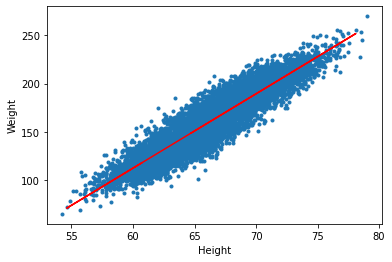

In [ ]:
plt.plot(x1,y1,'.')
plt.plot(x_test,y_pred_test,'red')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [ ]:
x2=df[['Height','Gender']]
y2=df[['Weight']]
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.25,random_state=0)
print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(7500, 2)
(2500, 2)
(7500, 1)
(2500, 1)


In [ ]:
reg1=LinearRegression()
reg1.fit(x_train2 ,y_train2)
y_pred_train2=reg1.predict(x_train2)
y_pred_test2=reg1.predict(x_test2)

In [ ]:
print("For Training Data:")
print("MSE=",mean_squared_error(y_train2,y_pred_train2))
print("MAE=",mean_absolute_error(y_train2,y_pred_train2))
print("R2 score=",r2_score(y_train2,y_pred_train2))
print("\nFor Test Data:")
print("MSE=",mean_squared_error(y_test2,y_pred_test2))
print("MAE=",mean_absolute_error(y_test2,y_pred_test2))
print("R2 score=",r2_score(y_test2,y_pred_test2))

For Training Data:
MSE= 99.53818507708819
MAE= 7.958278139625603
R2 score= 0.9030833126908686

For Test Data:
MSE= 102.39646885019077
MAE= 8.092055004104235
R2 score= 0.9017457495522369
